In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [22]:
def calculate_knn_scores(interval:list ,X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:pd.DataFrame, y_test:pd.DataFrame)->list:
  """Calculates the KNN interval for the scores and returns a list of the scores

  Args:
      interval List type
      X_train -> Pandas Dataframe
      X_test -> Pandas Dataframe
      y_train -> Pandas Dataframe
      y_test -> Pandas Dataframe
  """
  scores = []
  
  for k in interval:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test,y_test))
  
  return scores

In [2]:
wine = datasets.load_wine()

In [5]:
df = pd.DataFrame(wine["data"], columns =wine["feature_names"])
df["target"] = wine["target"]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
df.shape

(178, 14)

In [10]:
X, y = df, df["target"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=55)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
knn.score(X_test,y_test)

0.6388888888888888

<Axes: >

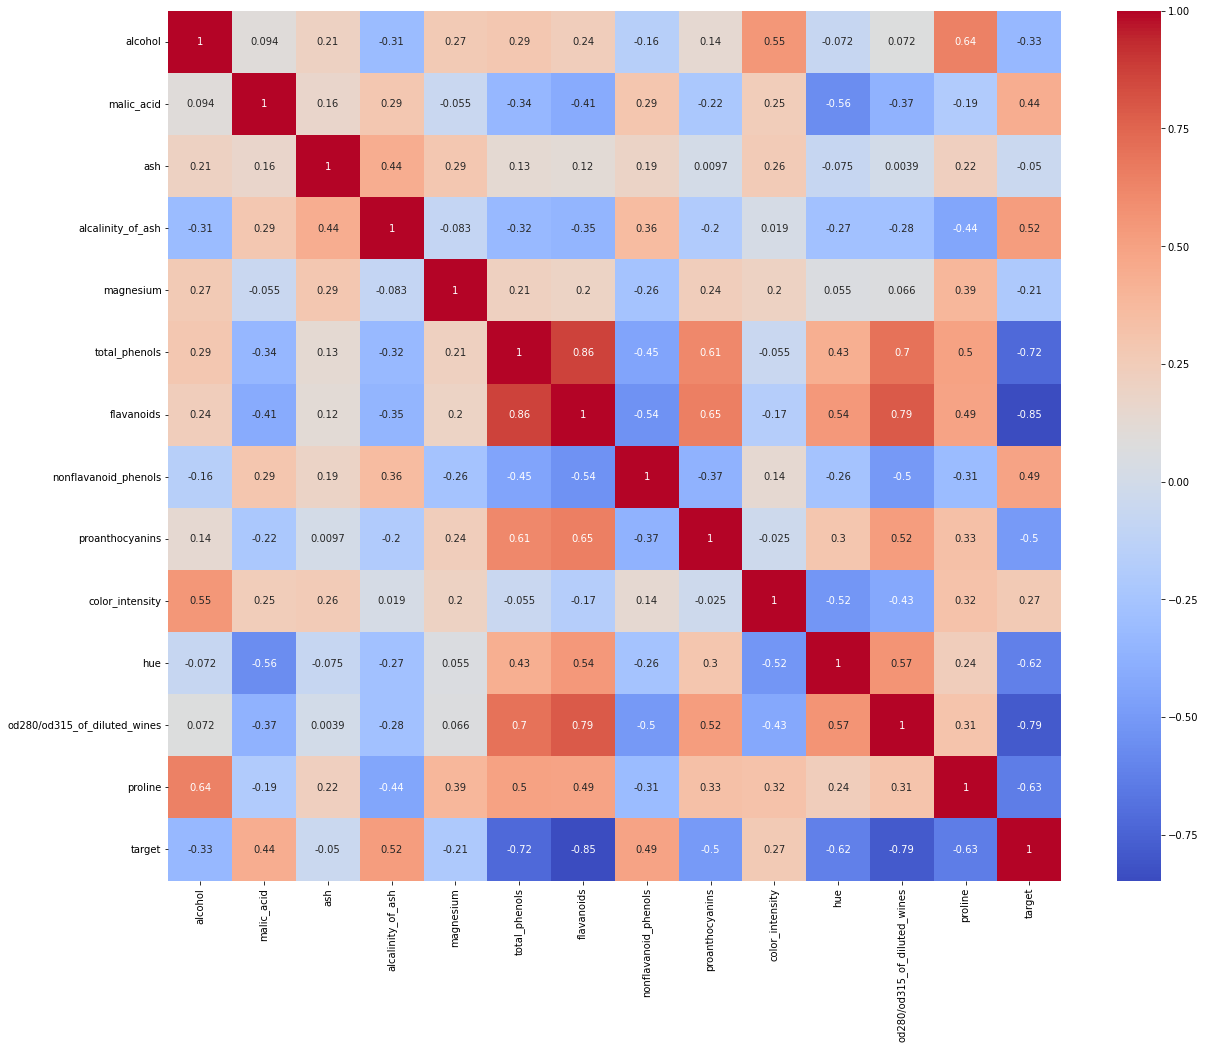

In [21]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot = True, cmap="coolwarm")

In [26]:
interval = list(range(1,25))

scores = calculate_knn_scores(interval,X_train, X_test, y_train, y_test)
scores

[0.75,
 0.7222222222222222,
 0.8333333333333334,
 0.6388888888888888,
 0.6388888888888888,
 0.6111111111111112,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6388888888888888,
 0.6388888888888888,
 0.6388888888888888,
 0.6388888888888888,
 0.6388888888888888,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666]

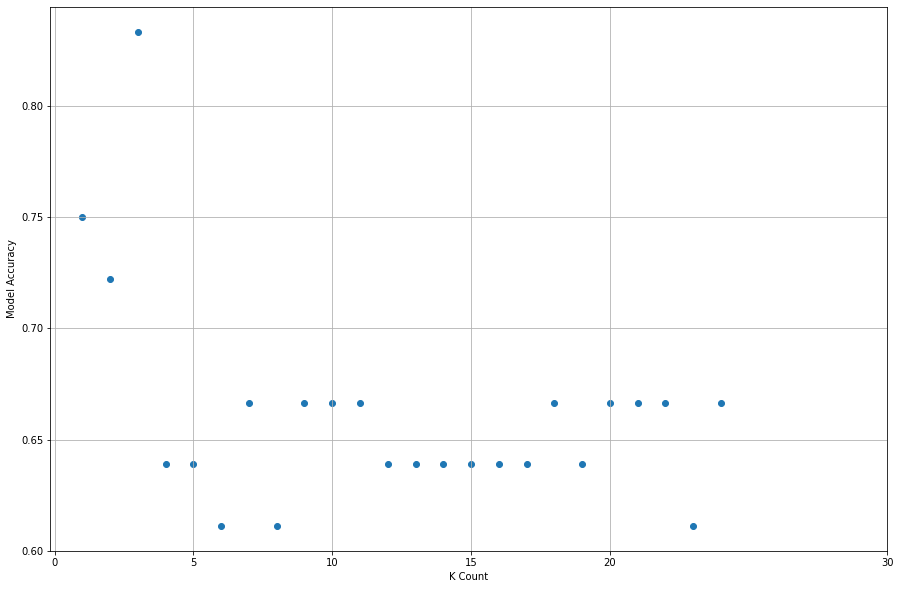

In [27]:
plt.figure(figsize= (15,10))
plt.xlabel("K Count")
plt.ylabel("Model Accuracy")
plt.scatter(interval, scores)
plt.grid()
plt.xticks([0, 5, 10, 15,20,30])
plt.show()